<a href="https://colab.research.google.com/github/arjunchint/substack/blob/main/senate_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import bisect

# Populations for the 50 states, already sorted from most to least
state_populations = [
    38889770, 30976754, 22975931, 19469232, 12951275, 12516863, 11812173,
    11145304, 10975017, 10041241, 9320865, 8752297, 7841283, 7497004, 7204002,
    7020058, 6892124, 6215144, 6196525, 5931367, 5914181, 5761530, 5464155,
    5143033, 4559475, 4540745, 4227337, 4088377, 3625646, 3454232, 3214315,
    3210931, 3089060, 2944376, 2940452, 2115266, 1990456, 1988698, 1766107,
    1430877, 1405105, 1402106, 1142746, 1098082, 1044321, 928767, 788940,
    733536, 647818, 586485
]

def get_half(populations):
  total_population = sum(populations)
  half_population = total_population/2
  i = 0
  while i < len(populations):
    total_population -= populations[i]
    if total_population < half_population:
      return i+1
    i += 1
  return -1

# Number of states
num_states = len(state_populations)

# Calculate average state population
total_population = sum(state_populations)
average_population = total_population / num_states
print("Number of States: ", num_states)
print("Total Population: ", total_population)
print("Average Population: ", average_population)
print("Population Ratio of Biggest to Smallest: ", state_populations[0]/state_populations[-1])
print("Number of Larger States for Majority of Population: ", get_half(state_populations))
print("Population of Smaller Half of States: ",sum(state_populations[25:]))
print("Population Share of Smaller 2/3 of States: ",100*sum(state_populations[16:])/total_population,"%")
print("Population Share of Smaller Half of States: ",100*sum(state_populations[25:])/total_population,"%")
print("Population Share of Smaller 40% of States that can Fillibuster: ",100*sum(state_populations[30:])/total_population,"%")

Number of States:  50
Total Population:  335871384
Average Population:  6717427.68
Population Ratio of Biggest to Smallest:  66.30991414955199
Number of Larger States for Majority of Population:  9
Population of Smaller Half of States:  54404781
Population Share of Smaller 2/3 of States:  31.703300749193925 %
Population Share of Smaller Half of States:  16.198099508233188 %
Population Share of Smaller 40% of States that can Fillibuster:  10.262393773921508 %


Senator Weight Based on Proportional Representation


Text(47, 0.6666, '2/3 Vote: 47')

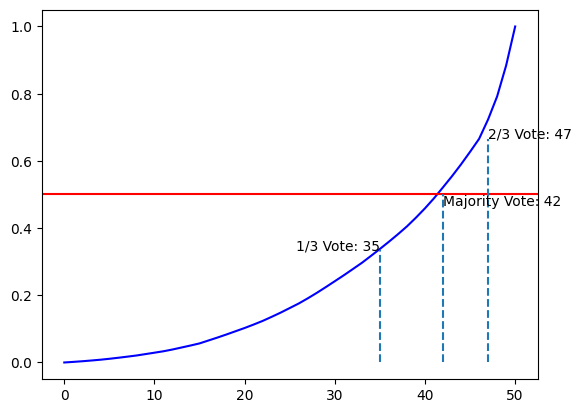

In [ ]:
proportional_representation = [state/sum(state_populations) for state in state_populations ]
cumulative = np.cumsum([0] + proportional_representation[::-1])
plt.plot(range(51), cumulative, c='blue')
plt.axhline(y=0.5, color='red')
plt.vlines(bisect.bisect_right(cumulative,.3333), 0, .3333, linestyles='--')
plt.text( bisect.bisect_right(cumulative,.3333), .3333,  "1/3 Vote: " + str(bisect.bisect_right(cumulative,.3333)),horizontalalignment='right',)
plt.vlines(bisect.bisect_right(cumulative,.5), 0, .5, linestyles='--')
plt.text(  bisect.bisect_right(cumulative,.5), .5, "Majority Vote: " + str(bisect.bisect_right(cumulative,.5)),horizontalalignment='left',verticalalignment='top')
plt.vlines(bisect.bisect_right(cumulative,.6666), 0, .6666, linestyles='--')
plt.text( bisect.bisect_right(cumulative,.6666), .6666,  "2/3 Vote: " + str(bisect.bisect_right(cumulative,.6666)),horizontalalignment='left',)

Senator Weights in proportion to the Square Root Normalization of the Population



In [ ]:
# Apply a root scale to the populations
root_populations = [math.sqrt(pop) for pop in state_populations]

# Total of root population values
total_root_populations = sum(root_populations)

# Proportional weights based on root values
root_proportional_weights = [root_pop / total_root_populations for root_pop in root_populations]

# Normalize these weights to sum up to 100
root_normalized_weights = [weight * 100 for weight in root_proportional_weights]

# Weight per senator
root_senator_weights = [weight / 2 for weight in root_normalized_weights]

print("Weight Ratio of Biggest to Smallest: ", root_proportional_weights[0]/root_proportional_weights[-1])
print("Number of Larger States for Majority of Population: ", get_half(root_proportional_weights))
print("Weight Share of Smaller 2/3 of States: ",100*sum(root_proportional_weights[16:]),"%")
print("Weight Share of Smaller Half of States: ",100*sum(root_proportional_weights[25:]),"%")
print("Weight Share of Smaller 40% of States: ",100*sum(root_proportional_weights[30:]),"%")


Weight Ratio of Biggest to Smallest:  8.143089963248103
Number of Larger States for Majority of Population:  16
Weight Share of Smaller 2/3 of States:  49.42029141936527 %
Weight Share of Smaller Half of States:  30.661853168190923 %
Weight Share of Smaller 40% of States:  22.008440078178143 %


Text(41, 0.6666, '2/3 Vote: 41')

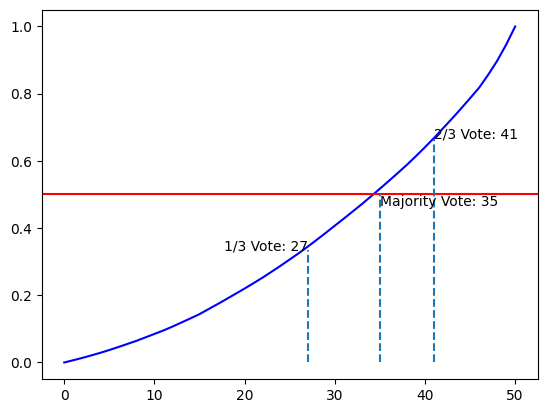

In [ ]:
cumulative = np.cumsum([0] + root_proportional_weights[::-1])
plt.plot(range(51), cumulative, c='blue')
plt.axhline(y=0.5, color='red')
plt.vlines(bisect.bisect_right(cumulative,.3333), 0, .3333, linestyles='--')
plt.text( bisect.bisect_right(cumulative,.3333), .3333,  "1/3 Vote: " + str(bisect.bisect_right(cumulative,.3333)),horizontalalignment='right',)
plt.vlines(bisect.bisect_right(cumulative,.5), 0, .5, linestyles='--')
plt.text(  bisect.bisect_right(cumulative,.5), .5, "Majority Vote: " + str(bisect.bisect_right(cumulative,.5)),horizontalalignment='left',verticalalignment='top')
plt.vlines(bisect.bisect_right(cumulative,.6666), 0, .6666, linestyles='--')
plt.text( bisect.bisect_right(cumulative,.6666), .6666,  "2/3 Vote: " + str(bisect.bisect_right(cumulative,.6666)),horizontalalignment='left',)


Senator Weights in proportion to the Z-Score Normalization of the Population


In [ ]:
# Calculate Standard Deviation of all state populations
real_std_devs = math.sqrt(sum([((pop - average_population) ** 2) for pop in state_populations])/len(state_populations))

# Calculate Z-Score of each state
z_scores = [(pop-average_population)/real_std_devs for pop in state_populations]

# Calculate scaled values from Z-Score
scaled_populations = [z_score + 1 if z_score > 0 else 1/(1-z_score) for z_score in z_scores]


# Total of scaled values
total_scaled_population = sum(scaled_populations)

# Proportional weights based on scaled values
scaled_proportional_weights = [scaled_pop / total_scaled_population for scaled_pop in scaled_populations]

# Normalize these weights to sum up to 100
scaled_normalized_weights = [weight * 100 for weight in scaled_proportional_weights]

# Weight per senator
scaled_senator_weights = [weight / 2 for weight in scaled_normalized_weights]

print("Weight Ratio of Biggest to Smallest: ", scaled_proportional_weights[0]/scaled_proportional_weights[-1])
print("Number of Larger States for Majority of Population: ", get_half(scaled_proportional_weights))
print("Weight Share of Smaller 2/3 of States: ",100*sum(scaled_proportional_weights[16:]),"%")
print("Weight Share of Smaller Half of States: ",100*sum(scaled_proportional_weights[25:]),"%")
print("Weight Share of Smaller 40% of States: ",100*sum(scaled_proportional_weights[30:]),"%")


Weight Ratio of Biggest to Smallest:  9.695158561958996
Number of Larger States for Majority of Population:  13
Weight Share of Smaller 2/3 of States:  42.32304326008809 %
Weight Share of Smaller Half of States:  27.984948838580813 %
Weight Share of Smaller 40% of States:  21.453981942426832 %


Text(45, 0.6666, '2/3 Vote: 45')

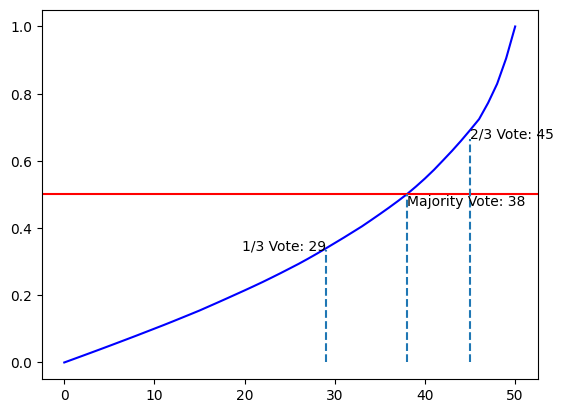

In [ ]:
cumulative = np.cumsum([0] + scaled_proportional_weights[::-1])
plt.plot(range(51), cumulative, c='blue')
plt.axhline(y=0.5, color='red')
plt.vlines(bisect.bisect_right(cumulative,.3333), 0, .3333, linestyles='--')
plt.text( bisect.bisect_right(cumulative,.3333), .3333,  "1/3 Vote: " + str(bisect.bisect_right(cumulative,.3333)),horizontalalignment='right',)
plt.vlines(bisect.bisect_right(cumulative,.5), 0, .5, linestyles='--')
plt.text(  bisect.bisect_right(cumulative,.5), .5, "Majority Vote: " + str(bisect.bisect_right(cumulative,.5)),horizontalalignment='left',verticalalignment='top')
plt.vlines(bisect.bisect_right(cumulative,.6666), 0, .6666, linestyles='--')
plt.text( bisect.bisect_right(cumulative,.6666), .6666,  "2/3 Vote: " + str(bisect.bisect_right(cumulative,.6666)),horizontalalignment='left',)
